In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
header_list = ["age","workclass","fnlwgt","education","education_num","marital-status","occupation",
               "relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country",
               "income"] #15 columns (14 features, 1 target).
dataset = pd.read_csv("C:/Users/ksmin/ds_teamproject/Dataset/Adult Data.csv", names=header_list)

print(dataset.info())
print()
print(dataset.isna().sum()) #non-null data.
print()
print(dataset.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

age               0
workclass         0
fnlwgt            0
education         0
educati

In [3]:
#dataset의 types
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [4]:
#dataset의 describe 파악.
dataset.describe(include = 'all')

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
#dataset의 변수값들 출력. 이상치 데이터 ?는 column workclass, occupation, native-country가 있다. 
for i in dataset.columns:
    print(i, '\n', dataset[i].unique(), '\n')

age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlwgt 
 [ 77516  83311 215646 ...  34066  84661 257302] 

education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

education_num 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Fa

In [6]:
#check the number of '?' present in each column
for i in dataset.columns:
    print(i, ':', sum(dataset[i] == ' ?'))

age : 0
workclass : 1836
fnlwgt : 0
education : 0
education_num : 0
marital-status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
capital-gain : 0
capital-loss : 0
hours-per-week : 0
native-country : 583
income : 0


In [33]:
#?를 replace를 한다.
print(dataset[(dataset['workclass']==' ?')&(dataset['occupation']==' ?')].shape[0])
print(dataset[dataset['workclass']==' ?'].shape[0])

#즉 dataset['workclass', 'occupation']에 있는 ? 결측치가 존재하는 행은같다 이유:1836개가 ?인 값을 지닌 
#workclass는 1843개가 ?인 값을 지닌 occupation에 포함이 되기 때문이다.


1836
1836


In [7]:
dataset['income'] = dataset['income'].map(lambda x: 1 if x==' >50K' else 0)

In [8]:
print(dataset[['income']].value_counts())

income
0         24720
1          7841
Name: count, dtype: int64


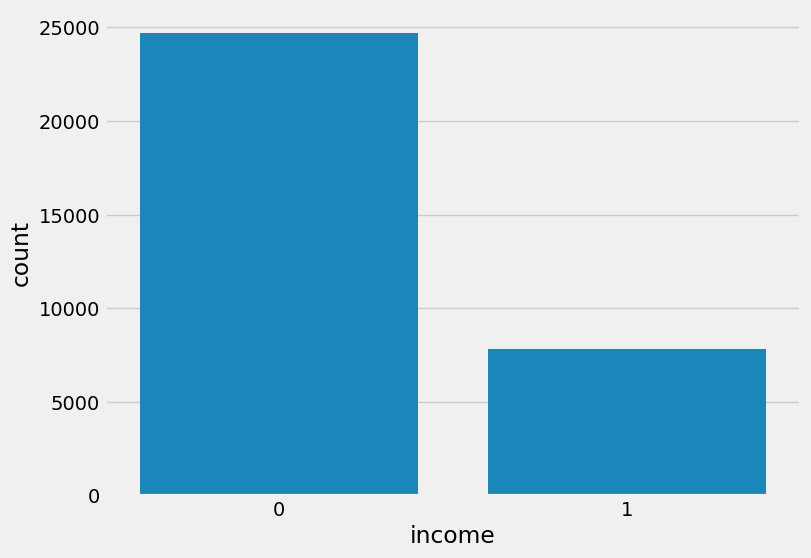

In [9]:
#현재 전체 데이터에서는 0이 압도적으로 많은 상태이다.
sns.countplot(x='income', data=dataset)
plt.show()

In [10]:
#train 데이터를 살펴보자
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=2024)

print(train_data.shape)

(22792, 15)


In [11]:
train_data[['income']].value_counts()

income
0         17260
1          5532
Name: count, dtype: int64

## Target ratio check

- />50 income = 1
- <=50 income = 0

<Axes: xlabel='income', ylabel='count'>

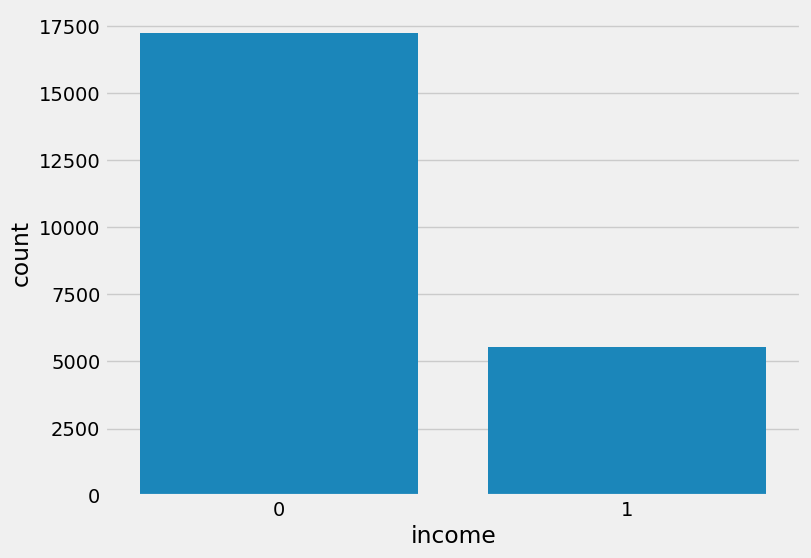

In [12]:
#target은 0이 1보다 많은 상황이다. -> 비중이 1/3이기 때문에 undersampling과정이 필요. 모델의 성능을 올리기 위해서는 불균형 데이터 문제.
sns.countplot(x='income', data = train_data)

### Age와 Target의 관계도

In [26]:
print("The age range is {} ~ {}".format(train_data['age'].min(), train_data['age'].max()))
print("Average Age is {:.2f}".format(train_data['age'].mean()))

The age range is 17 ~ 90
Average Age is 38.54


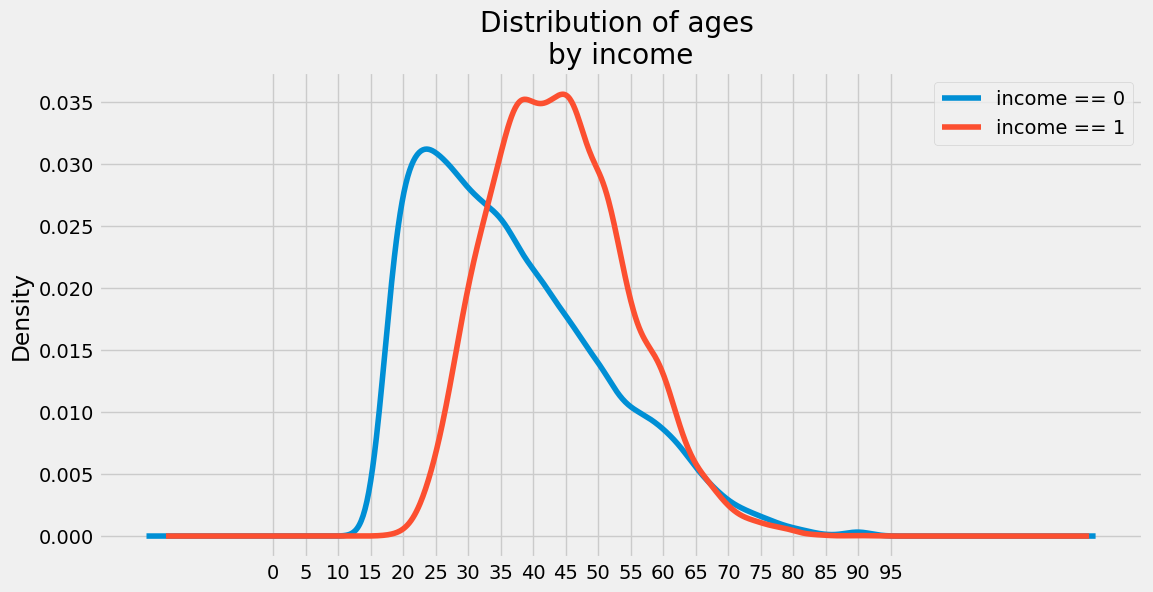

In [27]:
# 소득에 따른 연령 구분
#나이가 많을 수록 소득이 올라가는 형태이다.
plt.figure(figsize=(12, 6))

train_data.loc[train_data['income'] == 0, 'age'].plot(kind='kde', label='income == 0')
train_data.loc[train_data['income'] == 1, 'age'].plot(kind='kde', label='income == 1')

plt.title('Distribution of ages \nby income')
plt.xticks(range(0, 100, 5))
plt.legend()
plt.show()

## fnlwgt feature Check : Final weight


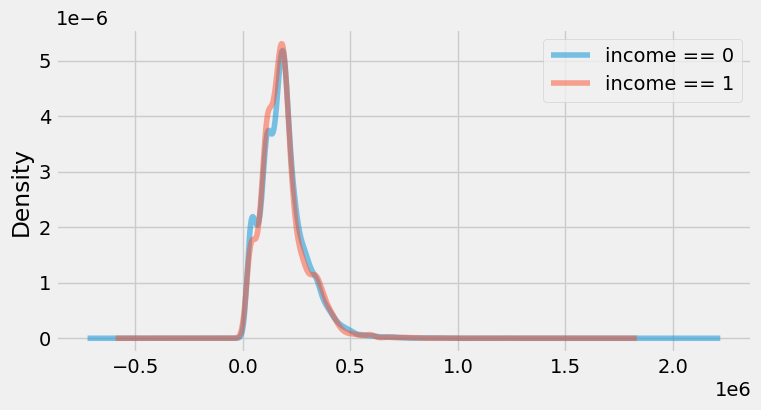

In [15]:
#data description에서 fnlwgt는 가중치를 의미한다. 대졸이고 결혼을 했고 하면 가중치가 올라간다는 의미이다. 
#fnlwgt가 모집단에서 차지하는 비율을 나타낸 것이다. 
#fnlwgt는 딱히 target값과 관계가 없다.
plt.figure(figsize=(8, 4))

train_data.loc[train_data['income'] == 0, 'fnlwgt'].plot(kind='kde', alpha=0.5, label='income == 0')
train_data.loc[train_data['income'] == 1, 'fnlwgt'].plot(kind='kde', alpha=0.5, label='income == 1')

plt.legend()
plt.show()

## Education_num check Target

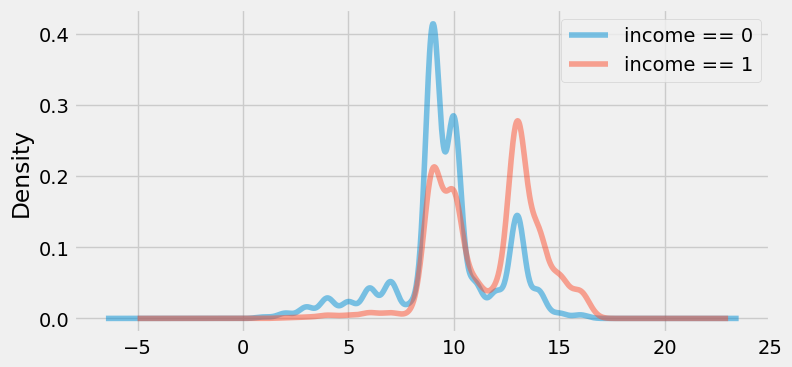

The education_num range is 1 ~ 16


In [28]:
#education_num과의 관계에서는 target을 분리할 수가 있다.
plt.figure(figsize=(8, 4))

train_data.loc[train_data['income'] == 0, 'education_num'].plot(kind='kde', alpha=0.5, label='income == 0')
train_data.loc[train_data['income'] == 1, 'education_num'].plot(kind='kde', alpha=0.5, label='income == 1')

plt.legend()
plt.show()

print("The education_num range is {} ~ {}".format(train_data['education_num'].min(), train_data['education_num'].max()))

## hours-per-week check


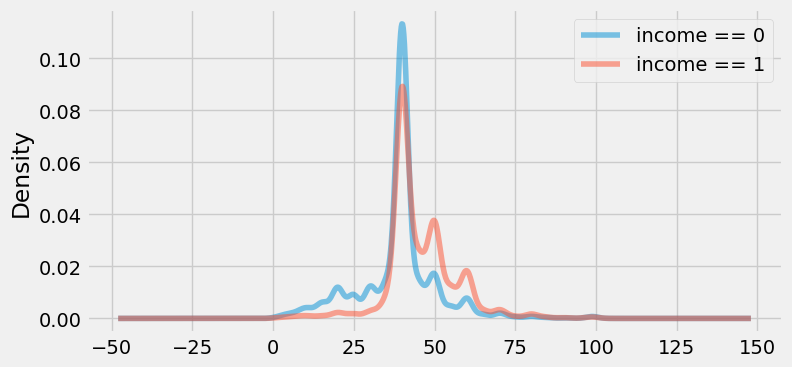

The working hours per week 1 ~ 99


In [29]:
#주당 근무시간은 딱히 상관이 없다.
plt.figure(figsize=(8, 4))

train_data.loc[train_data['income'] == 0, 'hours-per-week'].plot(kind='kde', alpha=0.5, label='income == 0')
train_data.loc[train_data['income'] == 1, 'hours-per-week'].plot(kind='kde', alpha=0.5, label='income == 1')

plt.legend()
plt.show()

print("The working hours per week {} ~ {}".format(train_data['hours-per-week'].min(), train_data['hours-per-week'].max()))

## Capital - gain, Capital - loss Check

- capital gain이 0이 아니면서 target값이 0인경우가 target이 1인 경우보다 훨씬 많다.
    즉 Capital gain이 있으면 target값이 0과 가까워진다.

- capital loss가 0이 아니면 target값이 1인 경우가 target이 0인 경우보다 훨씬 많다.
    즉 Capital loss가 있으면 target값이 1과 가까워진다.

### 그럼 Capital gain과 Capital loss는 뭘까?

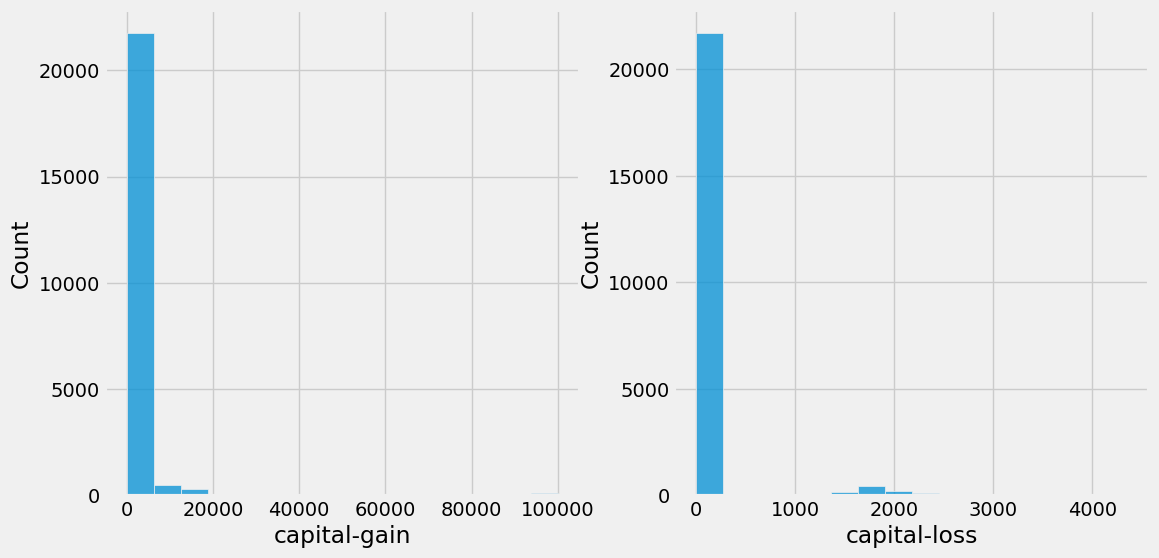

In [29]:
#data중에서 값이 0인 데이터가 너무 많기 때문에 0인 아닌 데이터의 비율을 체크한다.
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(train_data['capital-gain'],kde=False, ax=ax[0])
sns.histplot(train_data['capital-loss'],kde=False, ax=ax[1])

plt.show()

In [31]:
capital_gain_notzero = train_data.loc[train_data['capital-gain']!=0]
capital_loss_notzero = train_data.loc[train_data['capital-loss']!=0]

print("Capital-gain: {}\t{:.2f}".format(len(capital_gain_notzero),len(capital_gain_notzero)/len(train_data)*100))
print("Capital-loss: {}\t{:.2f}".format(len(capital_loss_notzero),len(capital_loss_notzero)/len(train_data)*100))

#Capital-gain에서 0이 아닌 값은 8.28%
#Capital-loss에서 0이 아닌 값은 4.73%

Capital-gain: 1888	8.28
Capital-loss: 1077	4.73


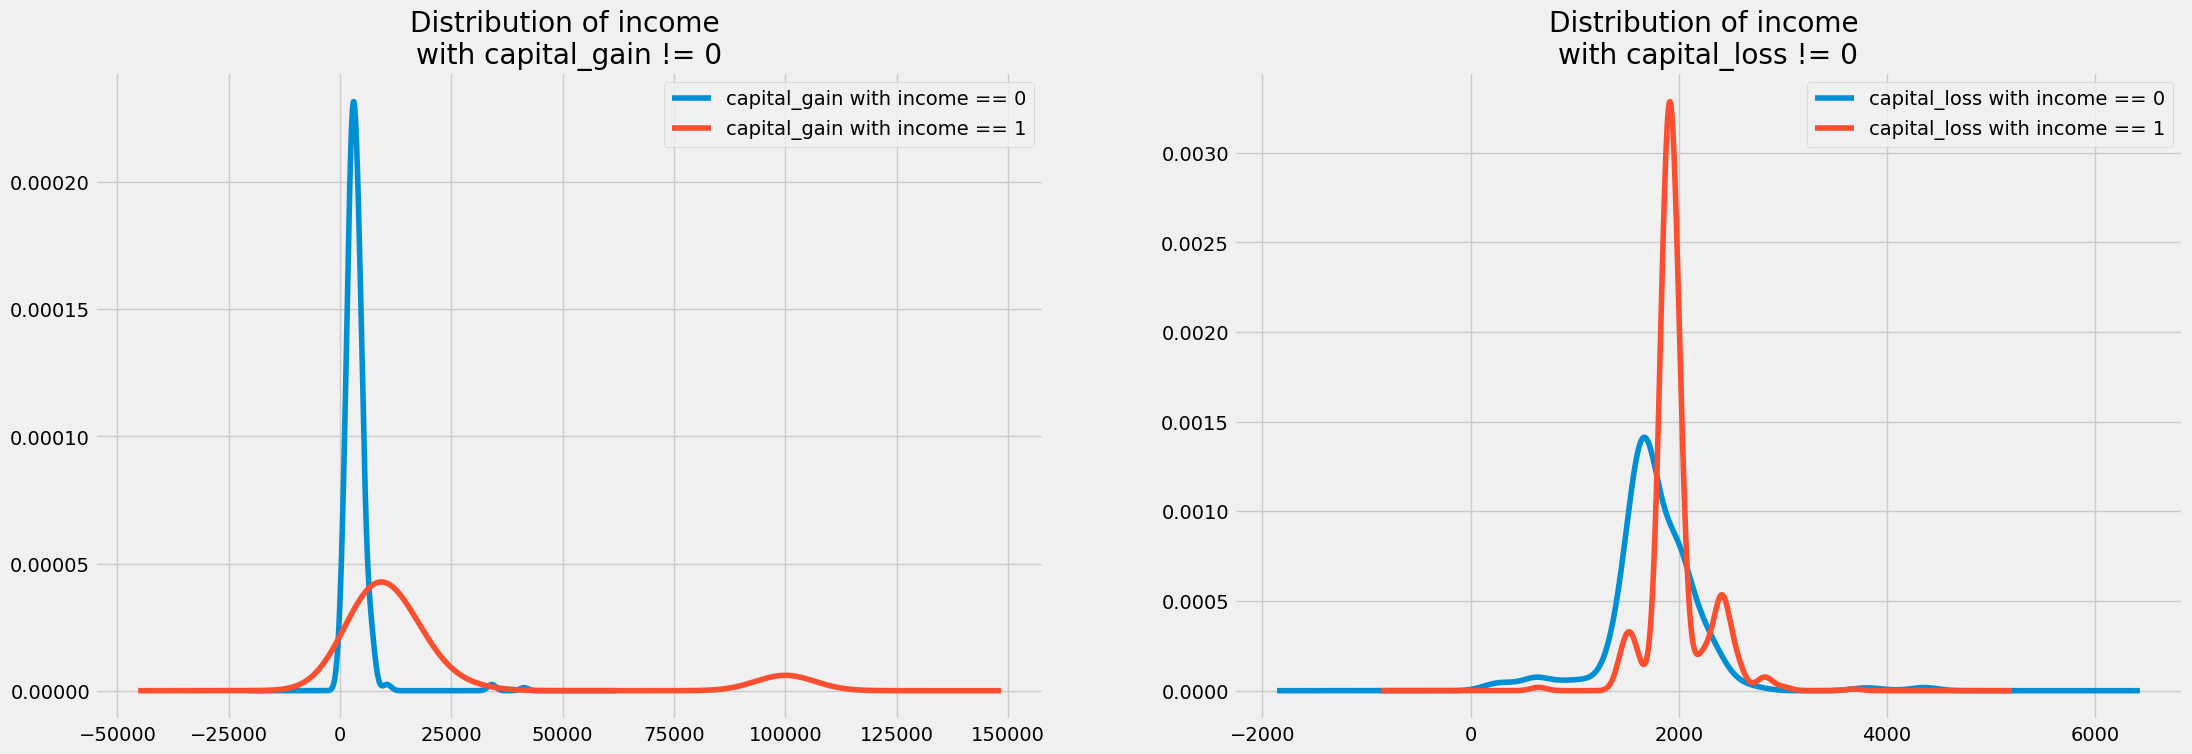

In [23]:
# 0이 아닌 데이터에 대하여 타겟에 따른 분포 확인
#share x, y를 통해 capital gain, loss에 대한 모집단에서의 target과의 관계를 확인.
#sharey를 통해 분포력 즉 모집단에서 얼마 만큼의 크기가 집중이 되어있는 지 확인 but 각각의 feature안에 분포되어있는 비율이 다르기 때문에 의미가 없다.
#sharex는 분포력, target과의 관계를 보기 위해서 굳이 x즉 feature value값들을 확인할 필요가 없다.
fig, ax = plt.subplots(1, 2, figsize=(24, 8))


# capital_gain이 0이 아닌 데이터에 대한 income 비교
train_data.loc[(train_data['capital-gain'] != 0) & (train_data['income'] == 0), 'capital-gain'].plot(kind='kde', label='capital_gain with income == 0', ax=ax[0])
train_data.loc[(train_data['capital-gain'] != 0) & (train_data['income'] == 1), 'capital-gain'].plot(kind='kde', label='capital_gain with income == 1', ax=ax[0])

ax[0].set_title('Distribution of income \nwith capital_gain != 0')
ax[0].set_ylabel('')
ax[0].legend()


# capital_loss가 0이 아닌 데이터에 대한 income 비교
train_data.loc[(train_data['capital-loss'] != 0) & (train_data['income'] == 0), 'capital-loss'].plot(kind='kde', label='capital_loss with income == 0', ax=ax[1])
train_data.loc[(train_data['capital-loss'] != 0) & (train_data['income'] == 1), 'capital-loss'].plot(kind='kde', label='capital_loss with income == 1', ax=ax[1])

ax[1].set_title('Distribution of income \nwith capital_loss != 0')
ax[1].set_ylabel('')
ax[1].legend()

plt.show()

## Education, Education_num Check

In [24]:
train_data[['education', 'education_num']].value_counts()

education     education_num
HS-grad       9                7323
Some-college  10               5122
Bachelors     13               3736
Masters       14               1220
Assoc-voc     11                981
11th          7                 806
Assoc-acdm    12                731
10th          6                 670
7th-8th       4                 448
Prof-school   15                420
9th           5                 363
12th          8                 299
Doctorate     16                284
5th-6th       3                 246
1st-4th       2                 113
Preschool     1                  30
Name: count, dtype: int64

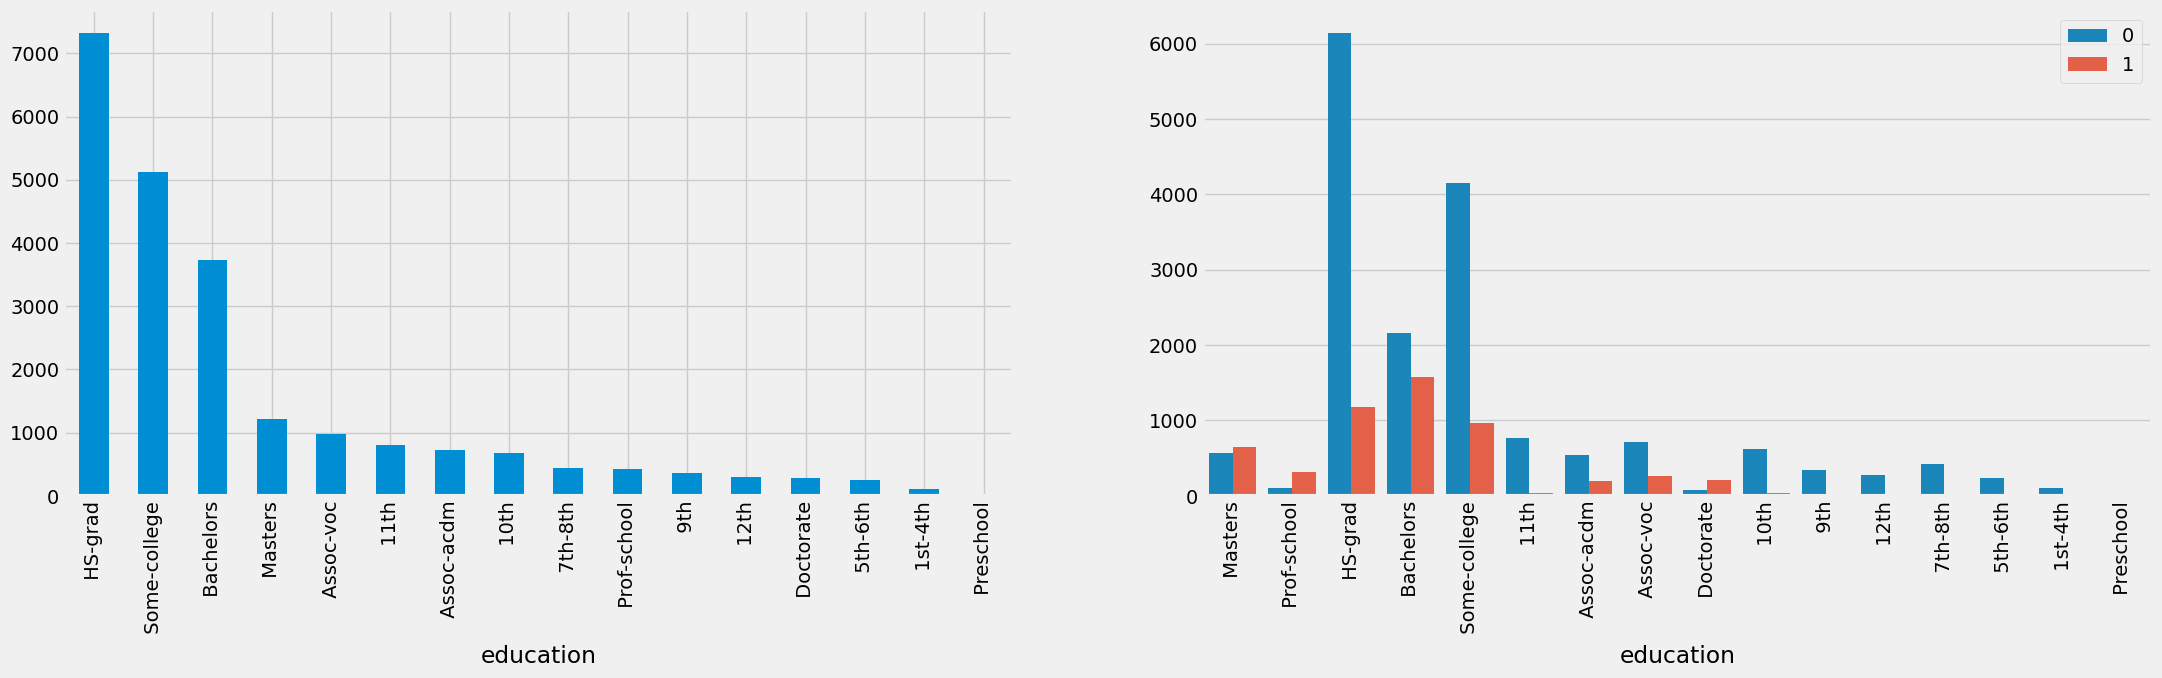

In [25]:
# education 분포 확인
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

train_data['education'].value_counts().plot(kind='bar', ax=ax[0])

# 타겟에 따른 분포 확인
sns.countplot(x='education', hue='income', data=train_data, ax=ax[1])
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].legend(loc='upper right')
ax[1].set_ylabel('')

plt.show()

#분포도에 따르면 HS-grad (high school 졸업자가 가장 많고), Barchelors 학사학위를 준비하는 사람들이다. -> target 1에 대해 분포도를 보여준다.

## WorkClass, Occupation의 ?값을 Drop하고 target과의 분석

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


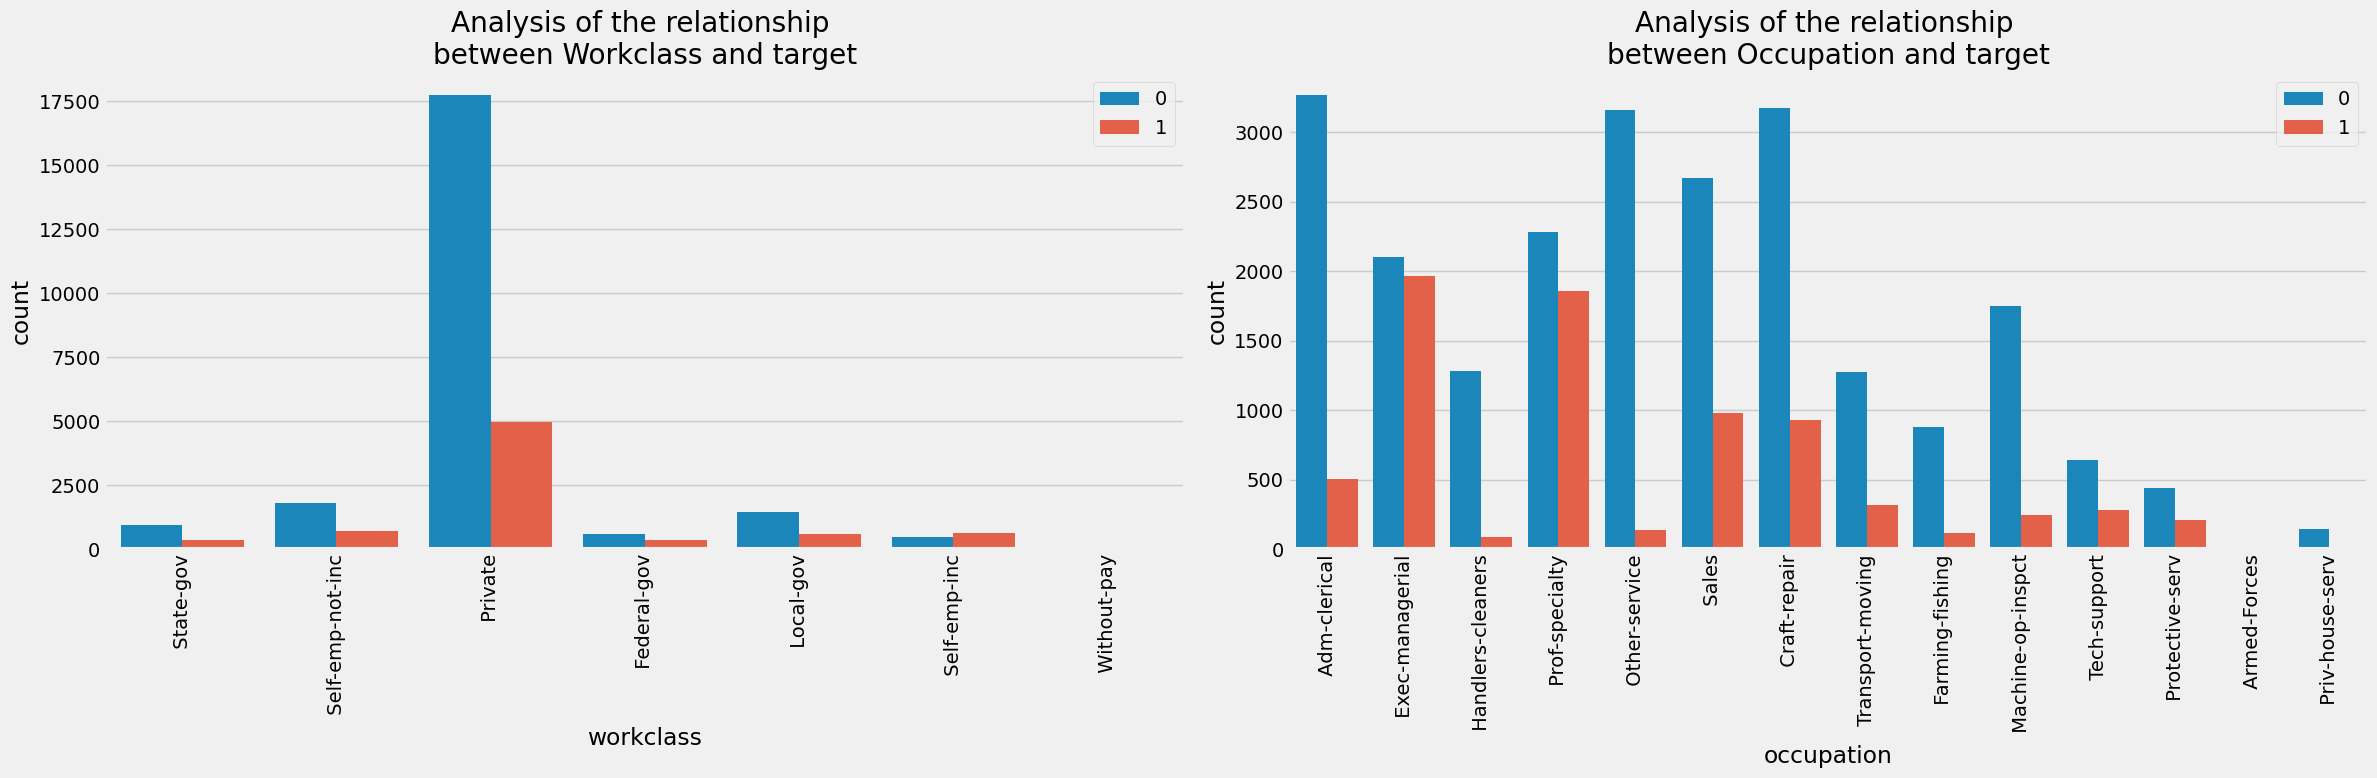

In [47]:
cleaned_dataset = dataset[(dataset['workclass']!=' ?')&(dataset['occupation']!=' ?')]

print(cleaned_dataset['workclass'].unique())
fig, ax = plt.subplots(1, 2, figsize=(24,8))
# Workclass와 target의 관계 분석
sns.countplot(data=cleaned_dataset, x='workclass', hue='income', ax=ax[0])
ax[0].legend(loc = 'upper right')
ax[0].tick_params(axis='x', labelrotation=90) #말이 길기 때문에 90도 회전을 한다.
ax[0].set_title("Analysis of the relationship \nbetween Workclass and target")

# Occupation과 target의 관계 분석
sns.countplot(data=cleaned_dataset, x='occupation', hue='income', ax=ax[1])
ax[1].legend(loc = 'upper right')
ax[1].set_title("Analysis of the relationship \nbetween Occupation and target")
ax[1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

#Occupation이랑 ' ?' 차이가 나는 이유는 Workclass에서 Never-worked가 존재하기 때문에 Occupation은 추가적인 ' ?' 7개가 존재한다.

## WorkClass, Occupation의 ?값을 Drop하지 않고 target과의 분석
- ' ?' 값이 target에게 어떤 영향을 주는 지 확인

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
# Workclass와 target의 관계 분석
sns.countplot(data=cleaned_dataset, x='workclass', hue='income', ax=ax[0])
ax[0].legend(loc = 'upper right')
ax[0].tick_params(axis='x', labelrotation=90) #말이 길기 때문에 90도 회전을 한다.
ax[0].set_title("Analysis of the relationship \nbetween Workclass and target")

# Occupation과 target의 관계 분석
sns.countplot(data=cleaned_dataset, x='occupation', hue='income', ax=ax[1])
ax[1].legend(loc = 'upper right')
ax[1].set_title("Analysis of the relationship \nbetween Occupation and target")
ax[1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()